In [64]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [65]:
# Specify Webpage for Scraping
page = requests.get('https://en.wikipedia.org/wiki/List_of_stars_on_the_Hollywood_Walk_of_Fame').text

# Parse the webpage to a BS4 object named 'soup'
soup = BeautifulSoup(page, 'html.parser')

# find all tables on the webpage (there are 45)
tables = soup.findAll('table', class_="wikitable")
print(len(tables), "tables found on this page")

# create a list to hold all the tables as dataframes
dfs = []

# Loop through each table and append to the list
for table in tables:
    
    # Read the HTML table directly into a pandas DataFrame
    df = pd.read_html(str(table))[0]
    dfs.append(df)

# Concatenate all DataFrames into one
final_df = pd.concat(dfs, ignore_index=True)
final_df = final_df[['Name', 'Category', 'Address', 'Date']]

45 tables found on this page


C:\Users\Janea\AppData\Local\Temp\ipykernel_3740\1807275204.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\Janea\AppData\Local\Temp\ipykernel_3740\1807275204.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\Janea\AppData\Local\Temp\ipykernel_3740\1807275204.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\Janea\AppData\Local\Temp\ipykernel_3740\1807275204.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a

In [66]:
final_df

,Name,Category,Address,Date
0,Bud Abbott,Motion pictures,1611 Vine Street,"February 8, 1960"
1,Bud Abbott,Radio,6333 Hollywood Boulevard,"February 8, 1960"
2,Bud Abbott,Television,6740 Hollywood Boulevard,"February 8, 1960"
3,Paula Abdul,Recording,7021 Hollywood Boulevard,"December 4, 1991"
4,Harry Ackerman,Television,6661 Hollywood Boulevard,"June 26, 1985"
...,...,...,...,...
2764,Robert Zemeckis,Motion pictures,6925 Hollywood Boulevard,"November 5, 2004"
2765,Efrem Zimbalist Jr,Television,7095 Hollywood Boulevard,"February 1, 1994"
2766,Hans Zimmer,Motion pictures,6908 Hollywood Boulevard,"December 8, 2010"
2767,Fred Zinnemann,Motion pictures,6629 Hollywood Boulevard,"February 8, 1960"


In [67]:
# Clean Categories
final_df['Category'] = final_df['Category'] .str.replace('performance', 'Performance')
final_df['Category'] = final_df['Category'] .str.replace('Motion pictures [note 1]', 'Motion Pictures')
final_df['Category'] = final_df['Category'] .str.replace('Motion pictures', 'Motion Pictures')
final_df['Category'].unique()

array(['Motion Pictures', 'Radio', 'Television', 'Recording',
       'Live Performance', 'Special', 'Sports entertainment', nan],
      dtype=object)

In [76]:
# #export to csv for manual cleaning
# pd.set_option('display.max_rows', 50) #sets max visible rows in visualstudio
final_df.to_csv('walk_of_fame2.csv')

#cleaned some names of walk of fame 2 manually in excel (see below) 
final_df = pd.read_csv(r'C:\Users\Janea\Desktop\walk_of_fame_cleaned2.csv')
final_df.dtypes

# Extract the year from the "Date" column
final_df['Date'] = pd.to_datetime(final_df['Date'])
final_df['Year'] = final_df['Date'].dt.year



In [77]:
final_df

,Name,Category,Address,Race,Date,Year
0,Burt Lancaster,Motion Pictures,6801 Hollywood Boulevard,White,1958-08-15,1958
1,David Torrence,Motion Pictures,6564 Hollywood Boulevard,White,1958-08-15,1958
2,Edward Sedgwick,Motion Pictures,6801 Hollywood Boulevard,White,1958-08-15,1958
3,Louise Fazenda,Motion Pictures,6801 Hollywood Boulevard,White,1958-08-15,1958
4,Olive Borden,Motion Pictures,6801 Hollywood Boulevard,White,1958-08-15,1958
...,...,...,...,...,...,...
2751,Sammy Hagar,Recording,6212 Hollywood Boulevard,White,2024-04-30,2024
2752,Frankie Valli The Four Seasons,Recording,6150 Hollywood Boulevard,White,2024-05-03,2024
2753,Chris Hemsworth,Motion Pictures,6819 Hollywood Boulevard,White,2024-05-23,2024
2754,Richard Blade,Radio,1725 Vine Street,White,2024-06-06,2024


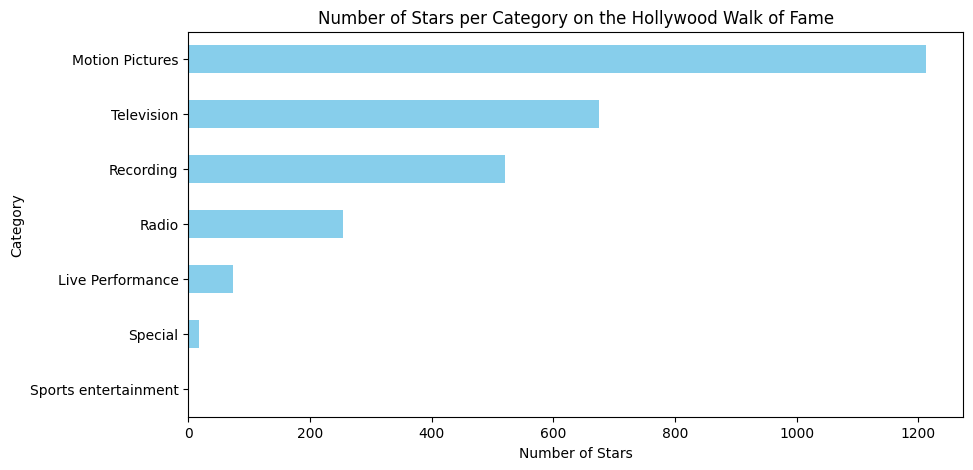

In [89]:

import matplotlib.pyplot as plt
# Visualization 1: Category with the Most Stars
category_counts = final_df['Category'].value_counts()

plt.figure(figsize=(10, 5))
category_counts.sort_values().plot(kind='barh', color='skyblue')
plt.title('Number of Stars per Category on the Hollywood Walk of Fame')
plt.xlabel('Number of Stars')
plt.ylabel('Category')
plt.show()

In [71]:
# #Create stacked bar chart of race and category

# race_category_counts = final_df.groupby(['Category', 'Race']).size().unstack().fillna(0)

# plt.figure(figsize=(12, 7))
# race_category_counts.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
# plt.title('Distribution of Stars by Race and Category on the Hollywood Walk of Fame')
# plt.xlabel('Number of Stars')
# plt.ylabel('Race')
# plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

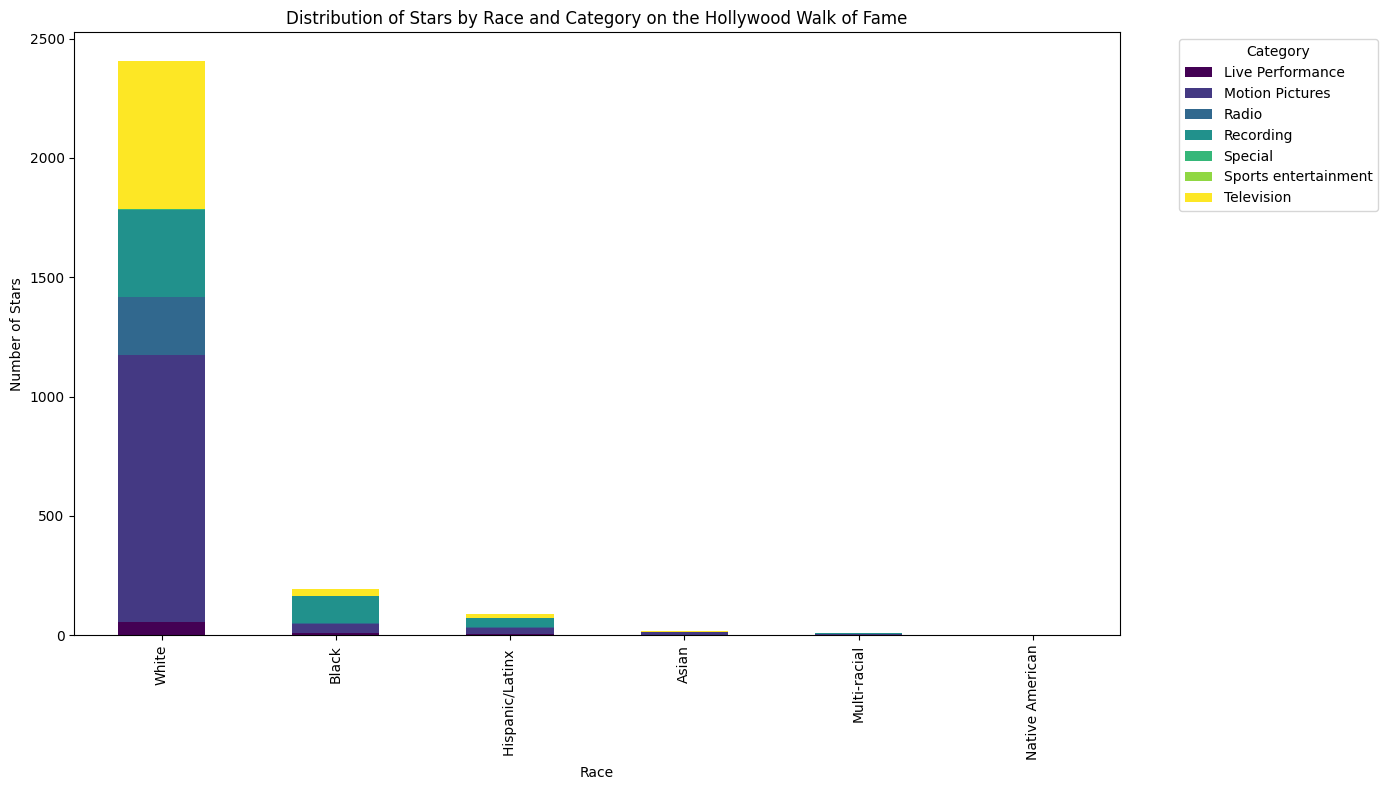

In [79]:
race_category_counts = final_df.groupby(['Race', 'Category']).size().unstack().fillna(0)

# Sort bars by total height
total_counts = race_category_counts.sum(axis=1).sort_values(ascending=False)
race_category_counts = race_category_counts.loc[total_counts.index]

# Ensure 'White' is at the bottom of the stacked bar chart
if 'White' in race_category_counts.index:
    race_category_counts = race_category_counts.reindex(['White'] + [i for i in race_category_counts.index if i != 'White'])

plt.figure(figsize=(14, 8))
race_category_counts.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Distribution of Stars by Race and Category on the Hollywood Walk of Fame')
plt.xlabel('Race')
plt.ylabel('Number of Stars')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

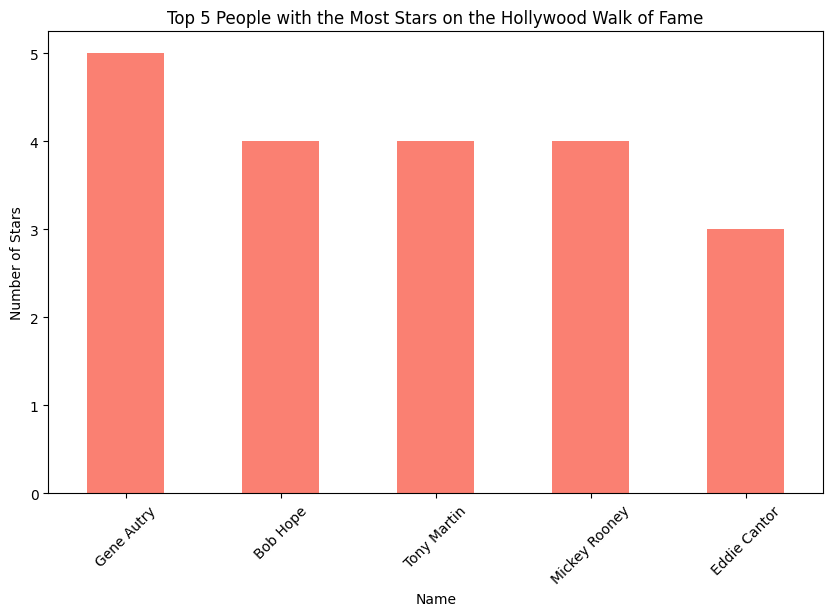

In [80]:
top_people = final_df['Name'].value_counts().head(5)

plt.figure(figsize=(10, 6))
top_people.plot(kind='bar', color='salmon')
plt.title('Top 5 People with the Most Stars on the Hollywood Walk of Fame')
plt.xlabel('Name')
plt.ylabel('Number of Stars')
plt.xticks(rotation=45)
plt.show()

In [81]:
race_counts = final_df['Race'].value_counts().reset_index()
race_counts.columns = ['Race', 'Count']

race_counts

,Race,Count
0,White,2406
1,Black,193
2,Hispanic/Latinx,87
3,Asian,17
4,Multi-racial,10
5,Native American,2


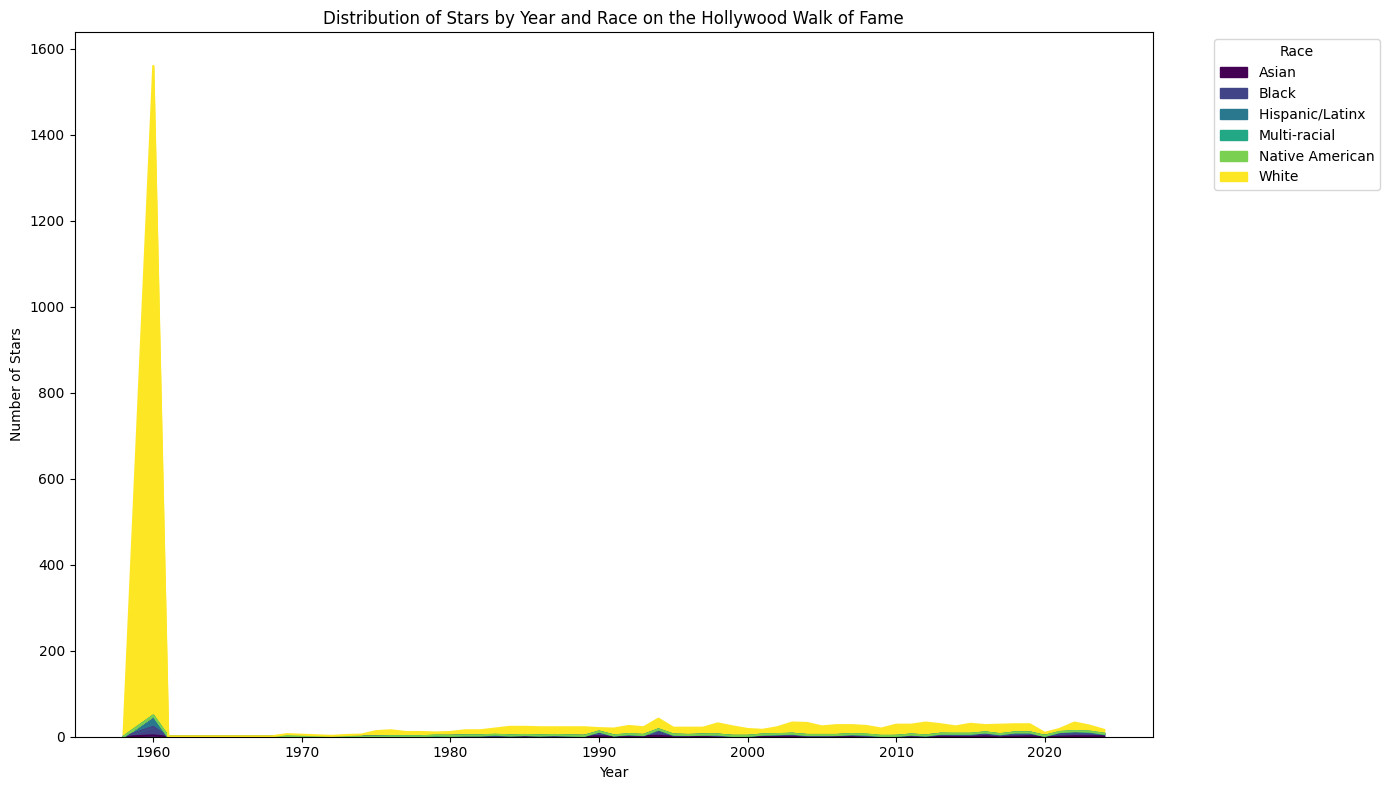

In [82]:


# Visualization: Distribution of Stars by Year and Race
race_year_counts = final_df.groupby(['Year', 'Race']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
race_year_counts.plot(kind='area', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Distribution of Stars by Year and Race on the Hollywood Walk of Fame')
plt.xlabel('Year')
plt.ylabel('Number of Stars')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

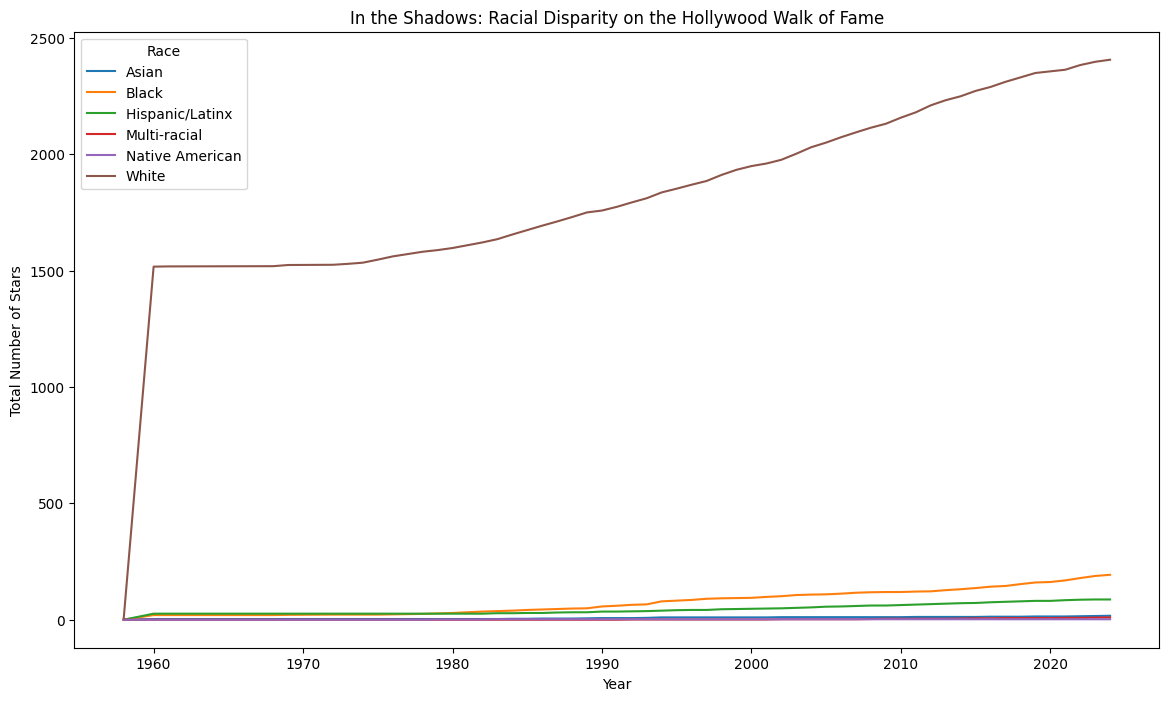

In [86]:
final_df = final_df.sort_values('Year')
final_df['cumulative_count'] = final_df.groupby('Race').cumcount() + 1

cumulative_df = final_df.pivot_table(index='Year', columns = 'Race', aggfunc = 'size', fill_value = 0).cumsum()
cumulative_df.plot(figsize = (14, 8))
plt.xlabel("Year")
plt.ylabel("Total Number of Stars")
plt.title("In the Shadows: Racial Disparity on the Hollywood Walk of Fame")
plt.legend(title = "Race")
plt.show()

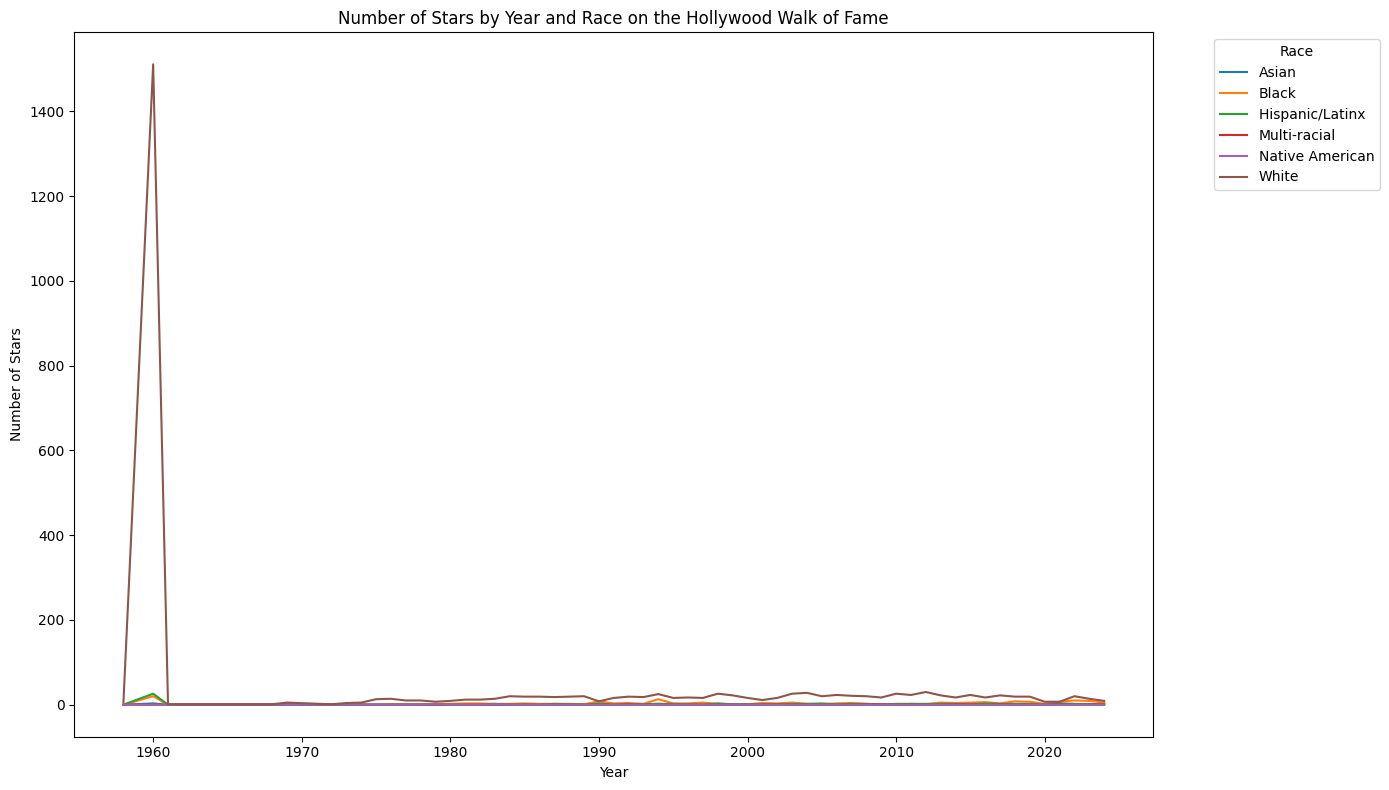

In [87]:

# Visualization: Line Plot of Stars by Year and Race
race_year_counts = final_df.groupby(['Year', 'Race']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
race_year_counts.plot(kind='line', ax=plt.gca())
plt.title('Number of Stars by Year and Race on the Hollywood Walk of Fame')
plt.xlabel('Year')
plt.ylabel('Number of Stars')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [88]:
final_df

,Name,Category,Address,Race,Date,Year,cumulative_count
0,Burt Lancaster,Motion Pictures,6801 Hollywood Boulevard,White,1958-08-15,1958,1.0
1,David Torrence,Motion Pictures,6564 Hollywood Boulevard,White,1958-08-15,1958,2.0
2,Edward Sedgwick,Motion Pictures,6801 Hollywood Boulevard,White,1958-08-15,1958,3.0
3,Louise Fazenda,Motion Pictures,6801 Hollywood Boulevard,White,1958-08-15,1958,4.0
4,Olive Borden,Motion Pictures,6801 Hollywood Boulevard,White,1958-08-15,1958,5.0
...,...,...,...,...,...,...,...
2748,Martha Reeves,Recording,7080 Hollywood Boulevard,Black,2024-03-27,2024,192.0
2749,Charles Fox,Recording,6752 Hollywood Boulevard,White,2024-04-05,2024,2404.0
2741,George Clinton,Recording,6752 Hollywood Boulevard,Black,2024-01-19,2024,193.0
2753,Chris Hemsworth,Motion Pictures,6819 Hollywood Boulevard,White,2024-05-23,2024,2405.0


In [ ]:
stars_by_race_by_year = final_df

In [ ]:
# Group by Race and Category and get the size (count)
race_category_counts = final_df.groupby(['Race', 'Category']).size().reset_index(name='Count')

print(race_category_counts)

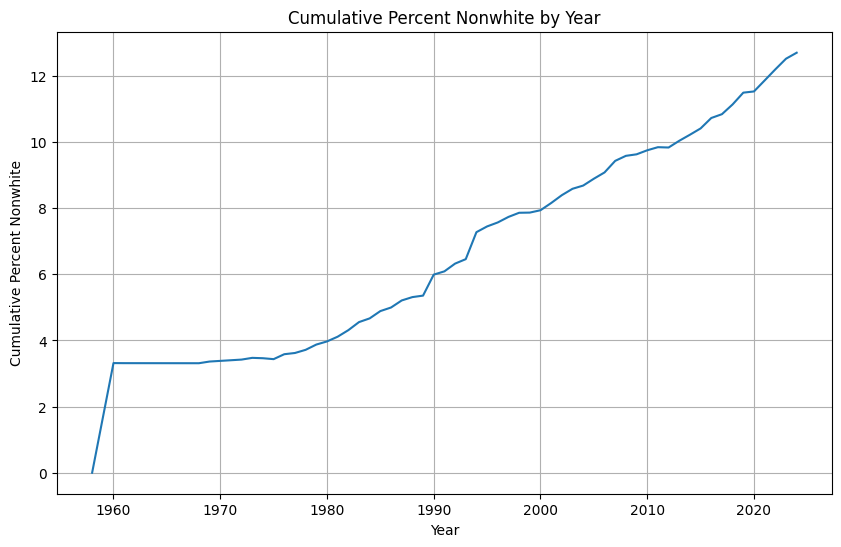

In [93]:
# Create a new column to indicate nonwhite
final_df['Nonwhite'] = final_df['Race'] != 'White'    ###### IS White in UPPER CASE?

# Sort the DataFrame by Year to ensure correct cumulative calculation
final_df = final_df.sort_values('Year').reset_index(drop=True)

# Calculate cumulative sum of nonwhite observations and cumulative count of all observations
final_df['Cumulative Nonwhite'] = final_df['Nonwhite'].cumsum()
final_df['Cumulative Total'] = final_df.index # Each row adds one to the cumulative count

# Calculate cumulative percent nonwhite by dividing cumulative nonwhite count by cumulative total
final_df['Cumulative Percent Nonwhite'] = (final_df['Cumulative Nonwhite'] / final_df['Cumulative Total']) * 100

# Get the cumulative percent nonwhite at the end of each year
cumulative_percent_nonwhite_by_year = final_df.groupby('Year')['Cumulative Percent Nonwhite'].last()

# Plot the timeseries
plt.figure(figsize=(10, 6))
plt.plot(cumulative_percent_nonwhite_by_year.index, cumulative_percent_nonwhite_by_year.values)
plt.title('Cumulative Percent Nonwhite by Year')
plt.xlabel('Year')
plt.ylabel('Cumulative Percent Nonwhite')
plt.grid(True)
# plt.xticks(cumulative_percent_nonwhite_by_year.index)
plt.show()